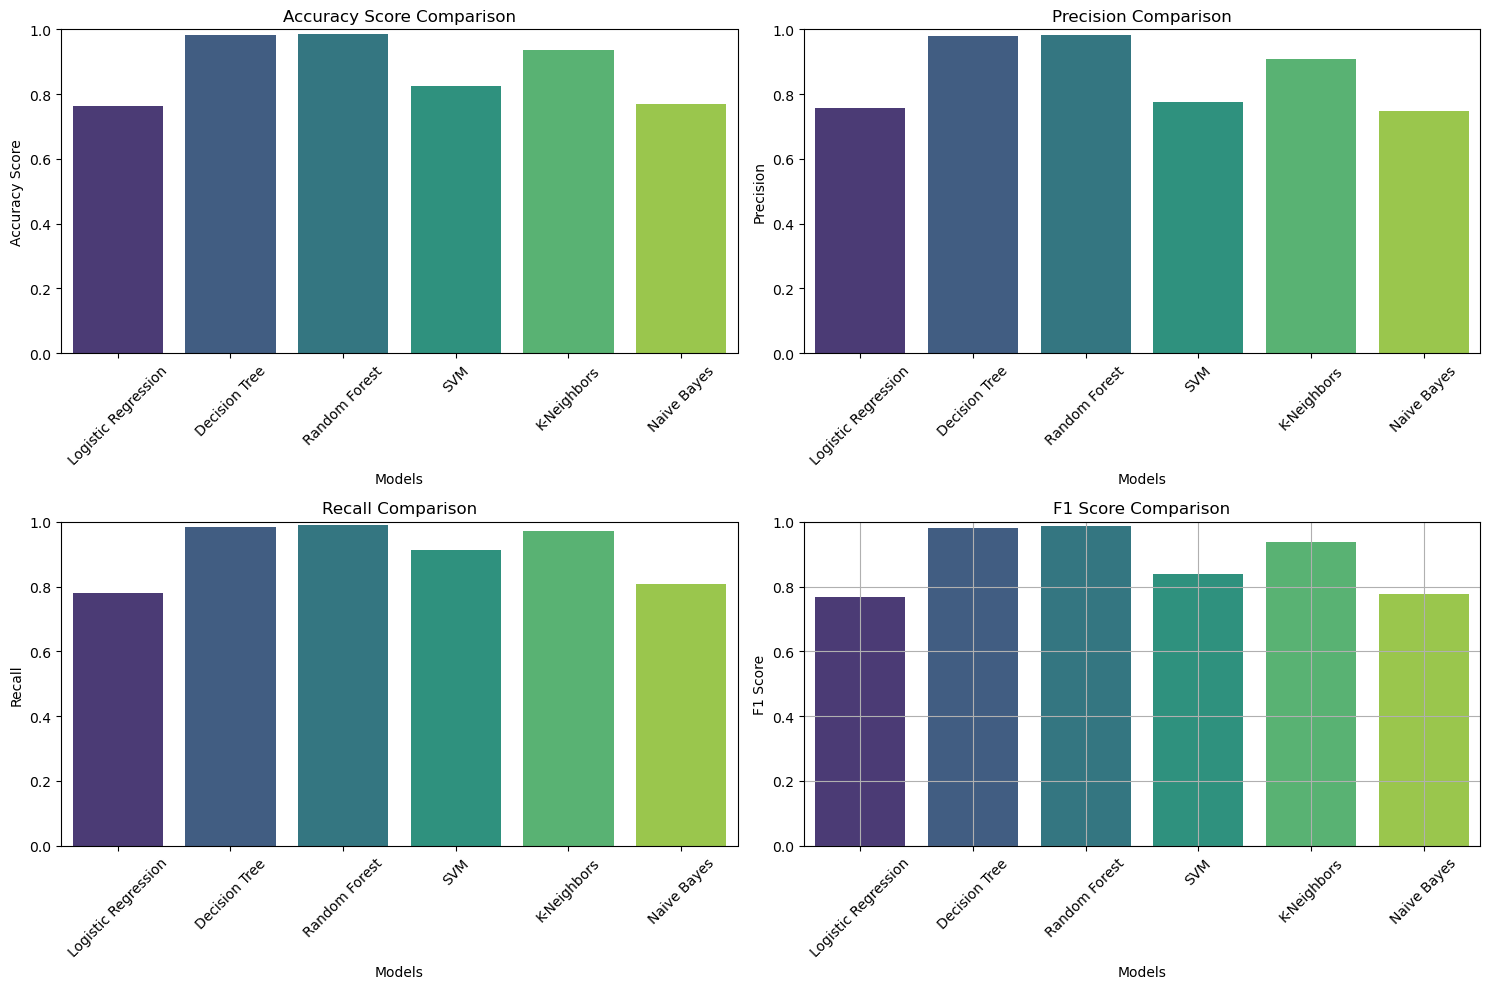

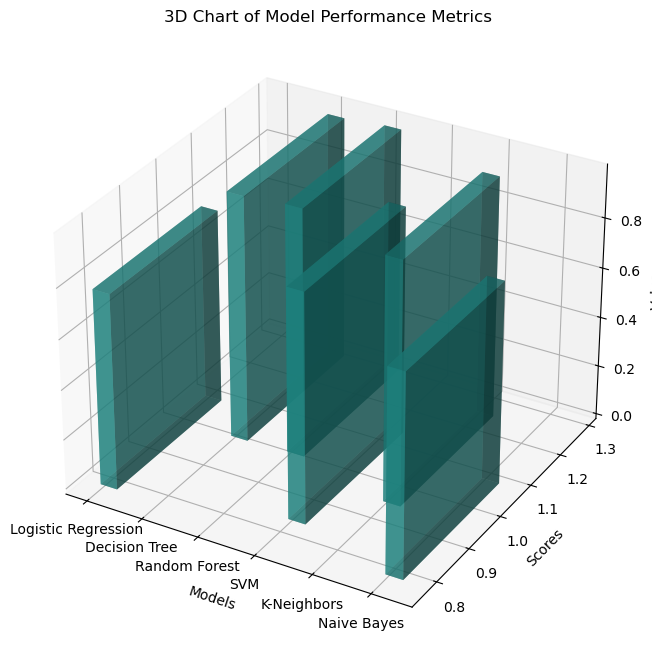

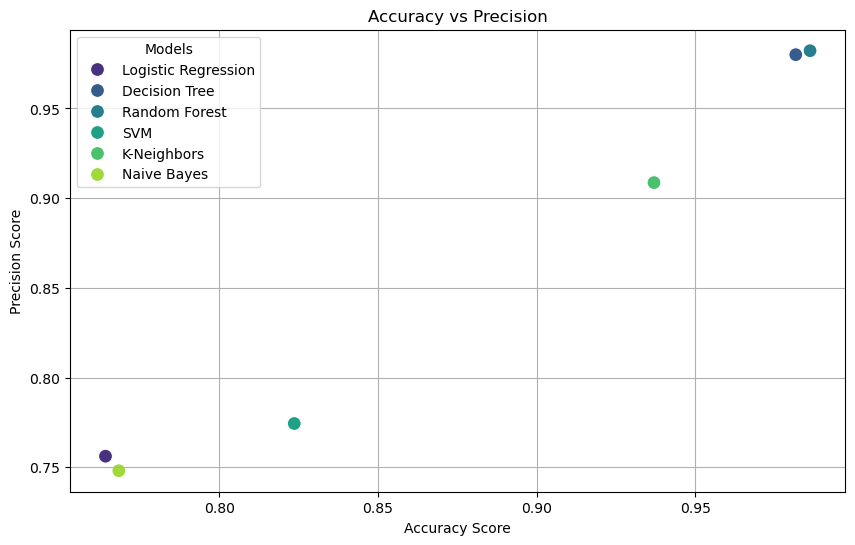

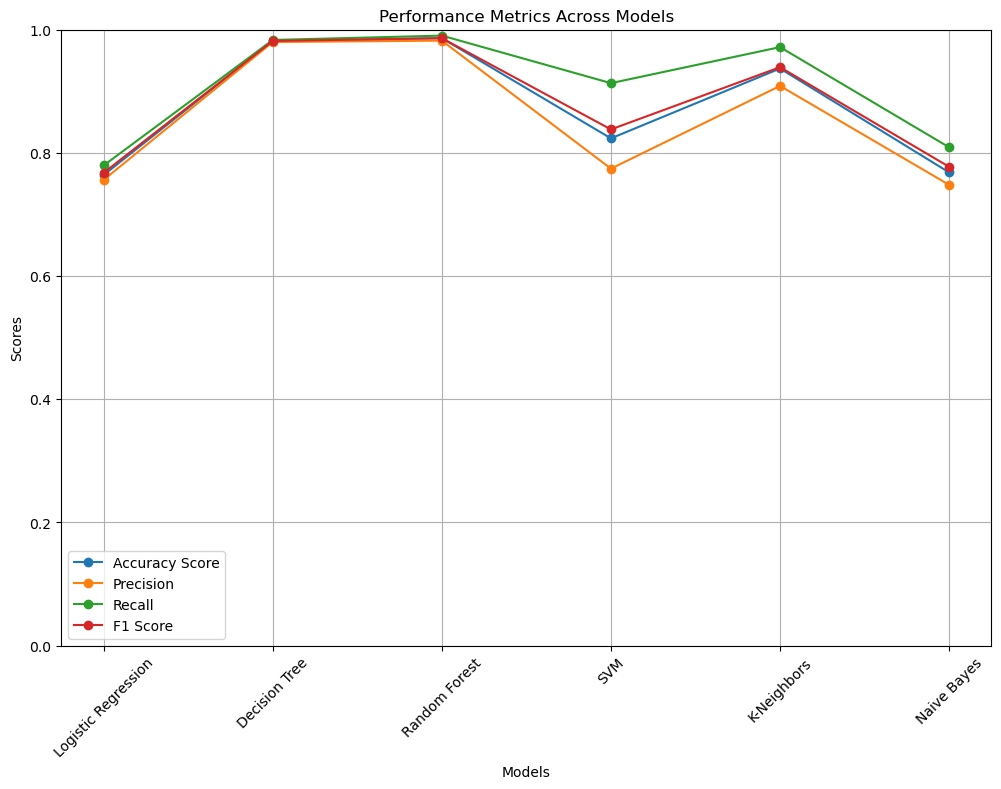

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load the uploaded cleaned stroke prediction dataset
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_stroke_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns='stroke')
y = data['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=None),
    'Random Forest': RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=None),
    'SVM': svm.LinearSVC(max_iter=1000),  # Increased max_iter for SVM convergence
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Result metrics from initial analysis
initial_results = {
    'Models': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'K-Neighbors', 'Naive Bayes'],
    'accuracy_score': [0.9862, 0.9817, 0.7641, 0.8236, 0.9370, 0.7683],
    'recall': [0.9904, 0.9833, 0.7796, 0.9132, 0.9717, 0.8091],
    'precision': [0.9822, 0.9800, 0.7562, 0.7744, 0.9087, 0.7481],
    'f1_score': [0.9862, 0.9817, 0.7677, 0.8381, 0.9391, 0.7774],
    'score_train': [None] * 6,  # Placeholder for training scores
    'score_test': [None] * 6,    # Placeholder for testing scores
    'cnf_matrix': [None] * 6     # Placeholder for confusion matrices
}

# Initialize a dictionary to store metrics for new models
calcs = {
    'Models': [],
    'score_train': [],
    'score_test': [],
    'accuracy_score': [],
    'recall': [],
    'precision': [],
    'f1_score': [],
    'cnf_matrix': []
}

# Fit models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    calcs['Models'].append(model_name)
    calcs['accuracy_score'].append(accuracy_score(y_test, y_pred))
    calcs['recall'].append(recall_score(y_test, y_pred))
    calcs['precision'].append(precision_score(y_test, y_pred))
    calcs['score_train'].append(model.score(X_train, y_train))
    calcs['score_test'].append(model.score(X_test, y_test))
    calcs['f1_score'].append(f1_score(y_test, y_pred))
    calcs['cnf_matrix'].append(metrics.confusion_matrix(y_test, y_pred))

# Integrate initial results to the calculator dictionary
for i, model_name in enumerate(initial_results['Models']):
    if model_name in calcs['Models']:
        index = calcs['Models'].index(model_name)
        calcs['accuracy_score'][index] = initial_results['accuracy_score'][i]
        calcs['recall'][index] = initial_results['recall'][i]
        calcs['precision'][index] = initial_results['precision'][i]
        calcs['f1_score'][index] = initial_results['f1_score'][i]

# Convert metrics to DataFrame
models_df = pd.DataFrame(calcs)
models_df = models_df.set_index('Models')

# Visualization
plt.figure(figsize=(15, 10))

# Metrics to plot
metrics = ['accuracy_score', 'precision', 'recall', 'f1_score']

# Use Seaborn for the bar plots
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=models_df.index, y=models_df[metric], palette='viridis', dodge=False, hue=models_df.index)
    plt.title(f'{metric.replace("_", " ").title()} Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel('Models')

plt.tight_layout()
plt.grid(True)
plt.show()

# 3D Bar Chart for Accuracy Score, Precision, Recall, and F1 Score
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(models_df.index))
y = np.array(models_df['accuracy_score'])
z = np.zeros_like(x)

# Set color map
cmap = plt.get_cmap('viridis')

# Bar width and depth
dx = dy = 0.3

ax.bar3d(x, y, z, dx, dy, models_df[['precision', 'recall', 'f1_score']].max(axis=1), color=cmap(0.5), alpha=0.6)
ax.set_xticks(x)
ax.set_xticklabels(models_df.index)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_zlabel('Values')
ax.set_title('3D Chart of Model Performance Metrics')
plt.show()

# Scatter Plot for Accuracy and Precision
plt.figure(figsize=(10, 6))
sns.scatterplot(data=models_df, x='accuracy_score', y='precision', hue=models_df.index, palette='viridis', s=100)
plt.title('Accuracy vs Precision')
plt.xlabel('Accuracy Score')
plt.ylabel('Precision Score')
plt.grid(True)
plt.show()

# Line Graph of Metrics
plt.figure(figsize=(12, 8))
for metric in ['accuracy_score', 'precision', 'recall', 'f1_score']:
    plt.plot(models_df.index, models_df[metric], marker='o', label=metric.replace("_", " ").title())

plt.title('Performance Metrics Across Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


   DAILY_STRESS         AGE  GENDER  SLEEP_HOURS
0           2.0    36 to 50  Female            7
1           3.0    36 to 50  Female            8
2           3.0  51 or more  Female            5
3           1.0  51 or more  Female            7
4           2.0  51 or more  Female            8
Missing Values in Each Column:
 DAILY_STRESS    1
AGE             0
GENDER          0
SLEEP_HOURS     0
dtype: int64
Class Distribution:
 DAILY_STRESS
5.0    72
3.0    71
2.0    67
4.0    64
1.0    60
0.0    55
Name: count, dtype: int64


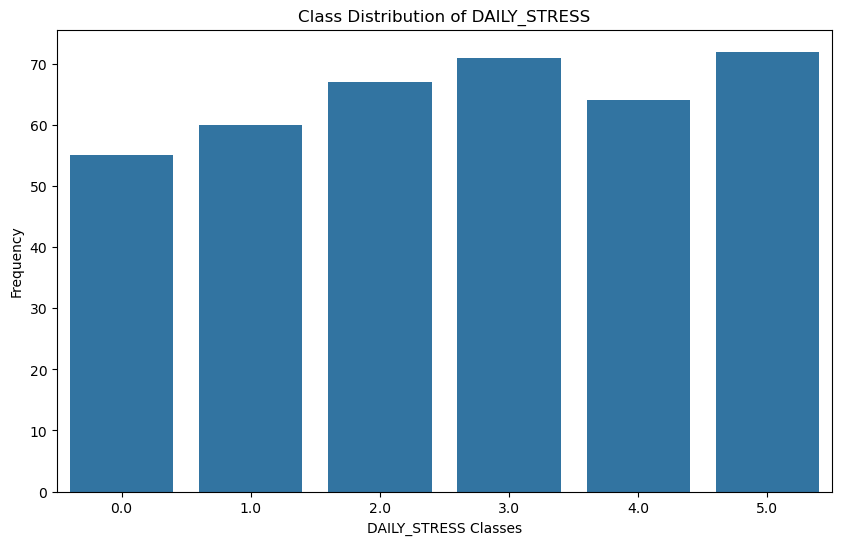

                        Train Score  Test Score  Accuracy    Recall  \
Models                                                                
Logistic Regression        0.200000    0.114943  0.114943  0.114943   
Decision Tree              0.301449    0.057471  0.057471  0.057471   
Random Forest              0.301449    0.011494  0.011494  0.011494   
Support Vector Machine     0.228986    0.068966  0.068966  0.068966   
K-Nearest Neighbors        0.260870    0.080460  0.080460  0.080460   
Naive Bayes                0.220290    0.103448  0.103448  0.103448   

                        Precision  F1 Score  \
Models                                        
Logistic Regression      0.074464  0.085846   
Decision Tree            0.021711  0.031199   
Random Forest            0.009679  0.010509   
Support Vector Machine   0.024288  0.034933   
K-Nearest Neighbors      0.031199  0.044061   
Naive Bayes              0.295479  0.096466   

                                                      

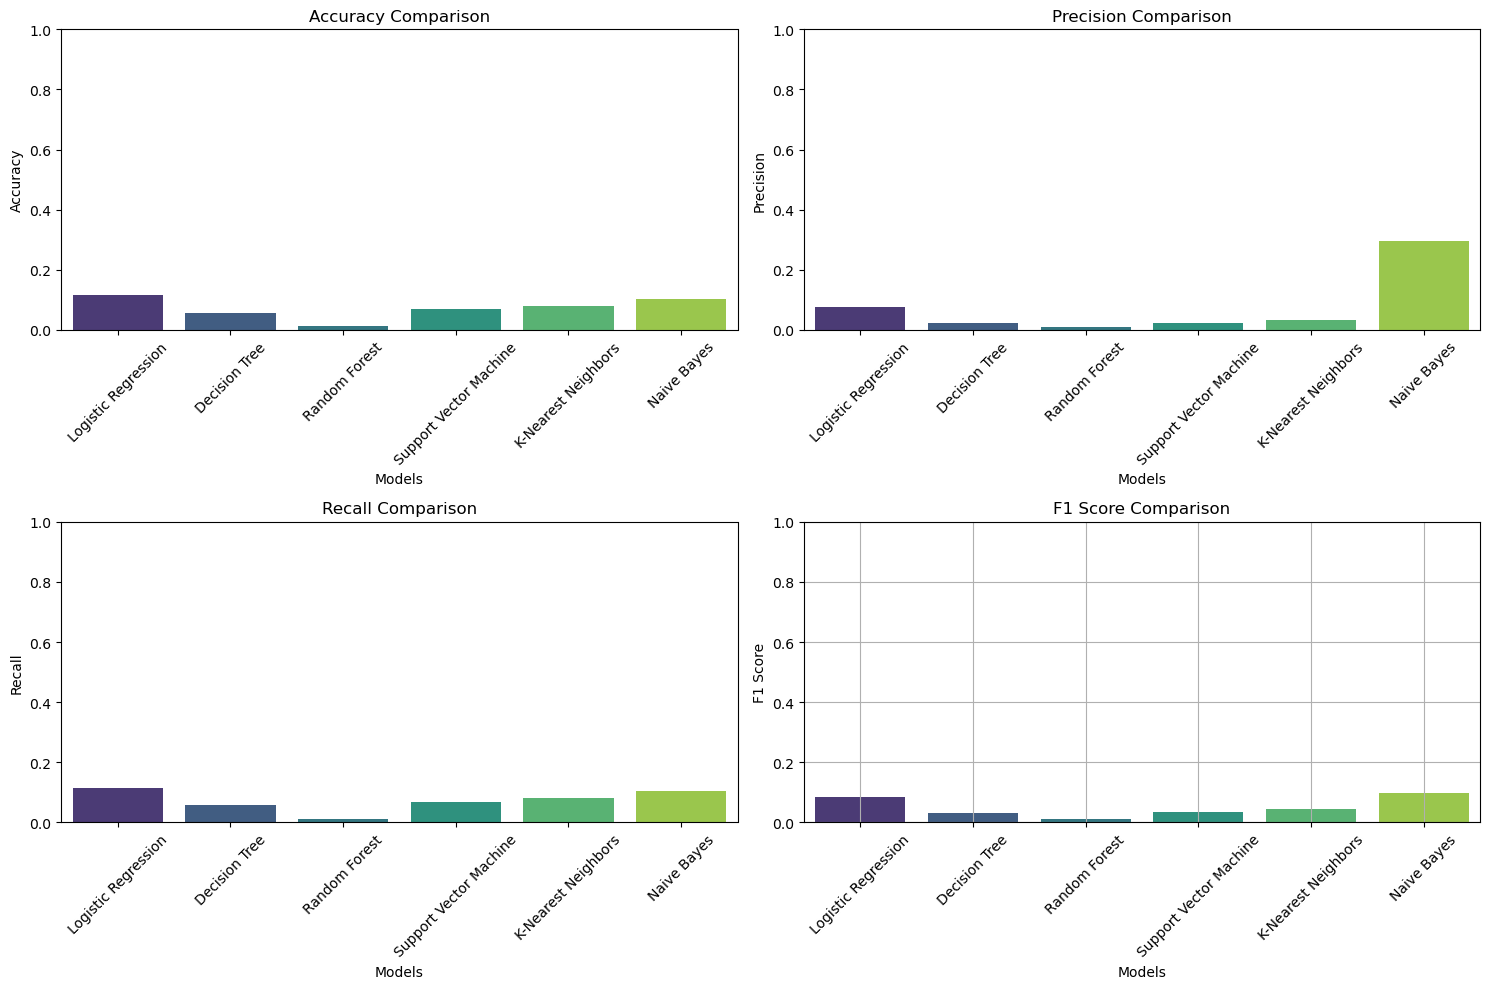

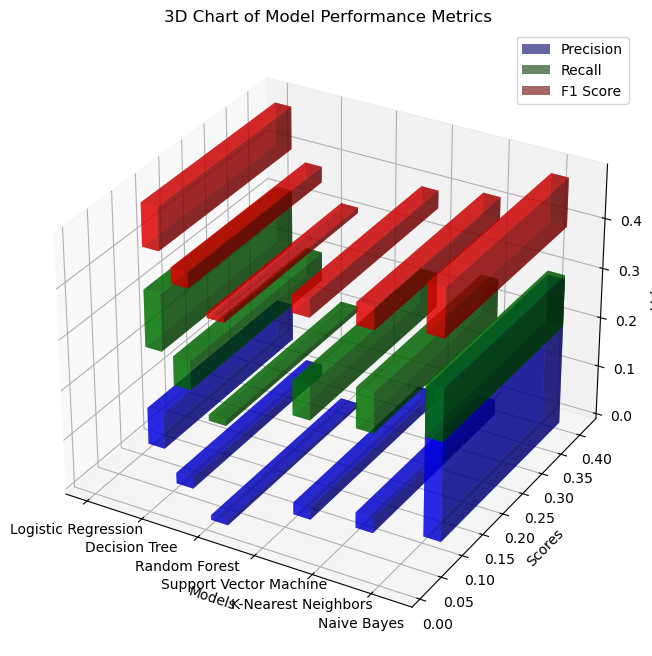

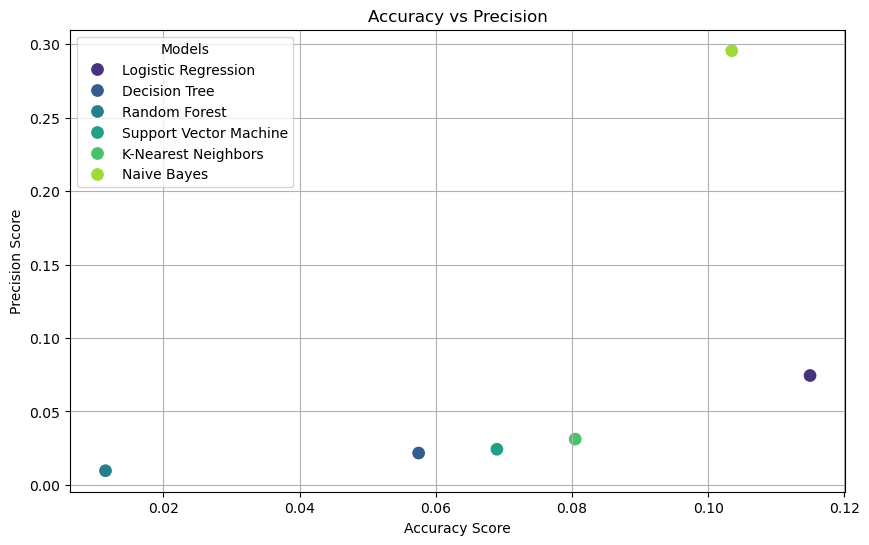

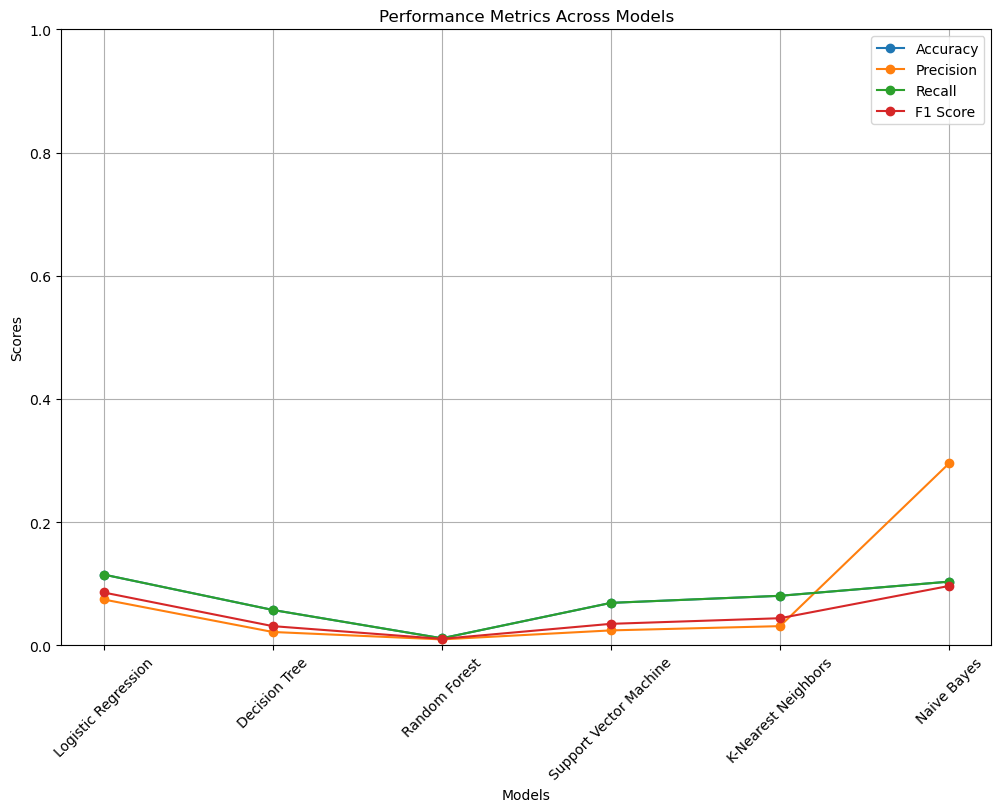

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Handle missing values in 'DAILY_STRESS' if any (already checked earlier)
if missing_values['DAILY_STRESS'] > 0:
    data = data.dropna(subset=['DAILY_STRESS'])

# Convert categorical variables to strings for encoding
data['AGE'] = data['AGE'].astype(str)
data['GENDER'] = data['GENDER'].astype(str)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in ['AGE', 'GENDER']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Specify features and target variable
X = data.drop(columns='DAILY_STRESS')
y = data['DAILY_STRESS']

# Assuming previous imports and data preparation steps are already in place...

# Analyze class distribution
class_distribution = y.value_counts()
print("Class Distribution:\n", class_distribution)

# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='DAILY_STRESS', data=data)
plt.title('Class Distribution of DAILY_STRESS')
plt.xlabel('DAILY_STRESS Classes')
plt.ylabel('Frequency')
plt.show()

# Sample more balanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=None),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42),
    'Support Vector Machine': svm.SVC(),  # Use SVC for better performance
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Store metrics in a dictionary
calcs = {
    'Models': [],
    'Train Score': [],
    'Test Score': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

# Fit each model and calculate evaluation metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    calcs['Models'].append(model_name)
    calcs['Accuracy'].append(accuracy_score(y_test, y_pred))
    calcs['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    calcs['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))  # Handle division by zero
    calcs['Train Score'].append(model.score(X_train, y_train))
    calcs['Test Score'].append(model.score(X_test, y_test))
    calcs['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    calcs['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))

# Convert the metrics to a DataFrame for better readability
models_df = pd.DataFrame(calcs).set_index('Models')

# Display the metrics DataFrame
print(models_df)

# Visualization of metrics
plt.figure(figsize=(15, 10))

# Create bar plots for the metrics
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metric_names):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=models_df.index, y=models_df[metric], palette='viridis', hue=models_df.index.tolist(), dodge=False)
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.xlabel('Models')

plt.tight_layout()
plt.grid(True)
plt.show()

# 3D Bar Chart for Accuracy, Precision, Recall, and F1 Score
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(models_df.index))
y = np.array(models_df['Accuracy'])

dx = dy = 0.3  # width and depth of bars
precision = models_df['Precision'].values
recall = models_df['Recall'].values
f1 = models_df['F1 Score'].values

# Create bars for Precision, Recall, and F1 Score
ax.bar3d(x, y, np.zeros_like(x), dx, dy, precision, color='blue', alpha=0.6, label='Precision')
ax.bar3d(x, y, 0.2 * np.ones_like(x), dx, dy, recall, color='green', alpha=0.6, label='Recall')
ax.bar3d(x, y, 0.4 * np.ones_like(x), dx, dy, f1, color='red', alpha=0.6, label='F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(models_df.index)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_zlabel('Values')
ax.set_title('3D Chart of Model Performance Metrics')
plt.legend()
plt.show()

# Scatter Plot for Accuracy vs Precision
plt.figure(figsize=(10, 6))
sns.scatterplot(data=models_df.reset_index(), x='Accuracy', y='Precision', hue='Models', palette='viridis', s=100)
plt.title('Accuracy vs Precision')
plt.xlabel('Accuracy Score')
plt.ylabel('Precision Score')
plt.grid(True)
plt.show()

# Line Graph of Metrics
plt.figure(figsize=(12, 8))
for metric in metric_names:
    plt.plot(models_df.index, models_df[metric], marker='o', label=metric)

plt.title('Performance Metrics Across Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()